In [1]:
from typing import Tuple, List
import pandas as pd
from enum import Enum
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep
from matplotlib import pyplot as plt

predefine static variables

In [2]:
COLUMNS = ["Height (Inches)","Weight (Pounds)"]

Group Enum

In [3]:
class Group(Enum):
    Null = 0
    Gender = 1

Scaler List for plt

In [4]:
# scaler list for plt
scalers = [(prep.StandardScaler(), "z-score"),(prep.MinMaxScaler(), "min-max"),(prep.RobustScaler(), "Robust")]

## Data Loader With Closure

In [5]:
# Define data_loader with closure
def data_loader(path: str, sheet:str):
    # Load DataFrame From Path
    loaded = pd.read_excel(path,sheet, index_col = None)
    # data provider closure return Tuple of list of Divided Group , listof groupname
    def get_datas(group: Group) -> Tuple[List[pd.DataFrame], List[str]]:
        # get copy of datafrme to prevant Duplicate IO from 2nd Disk
        df = loaded.copy()

        # Divide DataFrame by Group
        group_column: str = ""
        if group == Group.Null:
            return ([df], [""])
        elif group == Group.Gender:
            group_column = "Sex"
        # drop na with make labels
        group_list = df[group_column].unique()
        group_list = group_list[~pd.isna(group_list)]
        keys: List[str] = [item for item in group_list.tolist()]
        return ([df[df[group_column] == key] for key in keys], keys)

    return get_datas

In [6]:
# Dataer Provicer
provider = data_loader("./bmi_data_phw3.xlsx","dataset")

In [7]:
df, _ = provider(Group.Null)
df = df[0]

DataSet : "bmi_data_phw3.xlsx

## Data exploration
### Data Overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              100 non-null    object 
 1   Age              100 non-null    int64  
 2   Height (Inches)  100 non-null    float64
 3   Weight (Pounds)  100 non-null    float64
 4   BMI              100 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


#### overview By Categorized by Sex

In [9]:
sex_list = df["Sex"].unique().tolist()
print("Size of Each Sex")
for item in sex_list:
    print("{}\t:{}".format(item, len(df[df["Sex"] == item])))


Size of Each Sex
Female	:55
Male	:45


#### overview By Categorized by BMI

In [10]:
bmi_list = df["BMI"].unique().tolist()
bmi_list.sort()
print("Size of Each Sex")
for item in bmi_list:
    print("{}\t:{}".format(item, len(df[df["BMI"] == item])))

Size of Each Sex
0	:11
1	:2
2	:27
3	:54
4	:6


### function for Height & Weight Histogram

In [11]:
def histo(title, datas):
    plt.hist(datas[COLUMNS[0]],bins=10, label=COLUMNS[0])
    plt.xlabel(COLUMNS[0])
    plt.title(title +" " +COLUMNS[0])
    plt.show()
    plt.hist(datas[COLUMNS[1]],bins=10, label=COLUMNS[1])
    plt.title(title +" " +COLUMNS[1])
    plt.show()

#### histogram of origin data

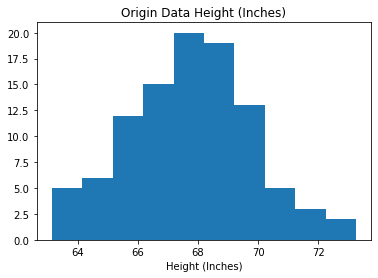

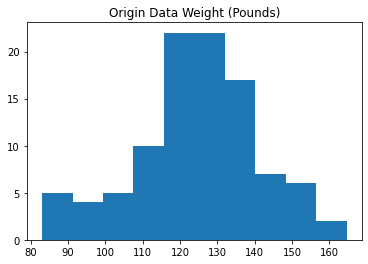

In [12]:
histo("Origin Data", df)

### Scaler With Prinout

In [13]:
def scale_with_plt(df, scaler, name):
    scaled = scaler.fit_transform(df[[COLUMNS[0], COLUMNS[1]]])
    df_scaled = pd.DataFrame()
    df_scaled[COLUMNS[0]] = scaled[:,0]
    df_scaled[COLUMNS[1]] = scaled[:,1]
    histo("Sacled with "+name, df_scaled)

#### Scaling With preseted

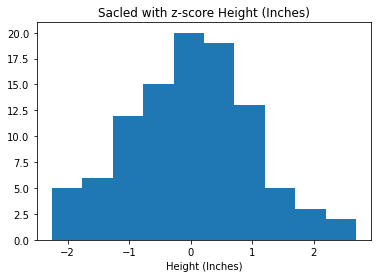

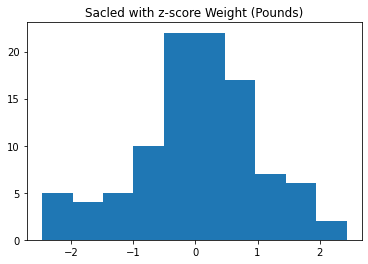

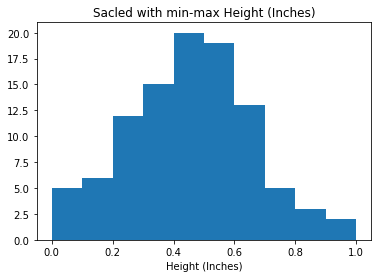

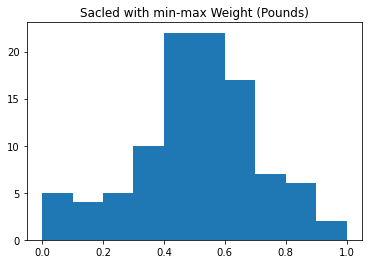

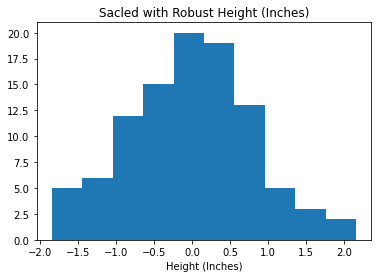

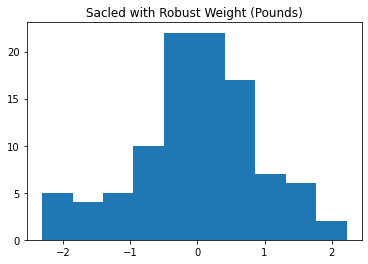

In [14]:
for scaler, title in scalers:
    scale_with_plt(df, scaler, title)    

# LinearRegression

In [18]:
def regression(df: pd.DataFrame)->pd.DataFrame:
    regressor = LinearRegression()
    height = df[COLUMNS[0]]
    weight = df[COLUMNS[1]]
    regressor.fit(height[:, np.newaxis], weight)
    result = df[[COLUMNS[0],COLUMNS[1]]]
    pred = regressor.predict(height[:, np.newaxis])    
    result["pred"] = pred
    #get error of regressed
    result["e"] = result[COLUMNS[1]] - result["pred"]
    return result

In [19]:
result = regression(df)
result["e"]=result["pred"] - result[COLUMNS[1]]

/tmp/ipykernel_185716/3840214713.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regressor.fit(height[:, np.newaxis], weight)
/tmp/ipykernel_185716/3840214713.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = regressor.predict(height[:, np.newaxis])
/tmp/ipykernel_185716/3840214713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["pred"] = pred
/tmp/ipykernel_185716/3840214713.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

### Function for plt error with standard Normalizing

In [20]:
# function for plt error with scoring
def plt_with_z_scoring(title,data):
    z_norm = prep.StandardScaler()
    z_norm.fit(data)
    z_score = z_norm.transform(data)
    plt.hist(z_score,bins=10)
    plt.title(title)
    plt.show()

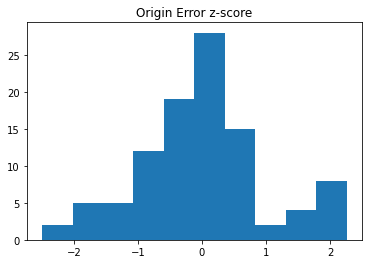

In [21]:
# Origin Data Plt
plt_with_z_scoring("Origin Error z-score",result[["e"]])

# More Programming with Group

### load grouped datas

In [24]:
# load grouped data & keys
df, keys = provider(Group.Gender)

### For 1st Gender

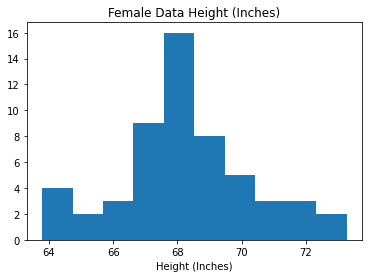

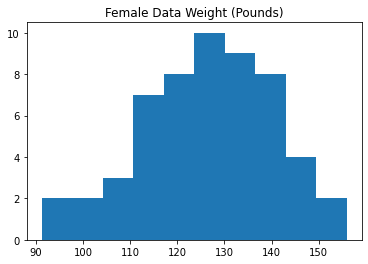

In [30]:
histo(keys[0]+" Data", df[0])

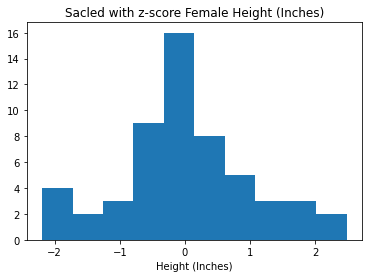

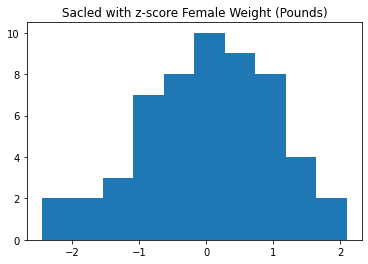

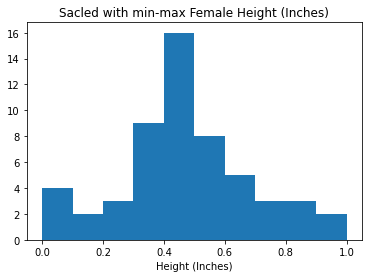

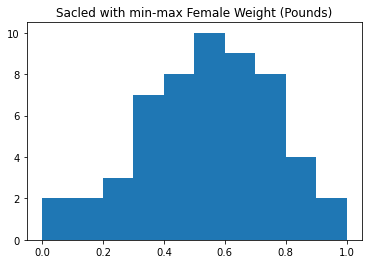

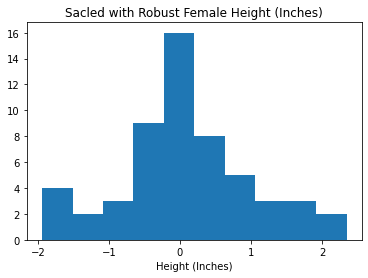

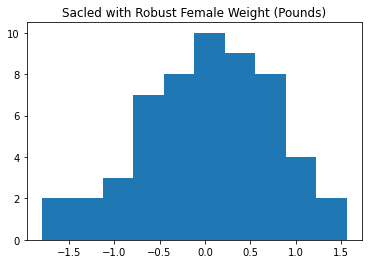

In [33]:
for scaler, title in scalers:
    scale_with_plt(df[0], scaler, title+" "+keys[0])  

#### regression and get error then plot

/tmp/ipykernel_185716/3840214713.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regressor.fit(height[:, np.newaxis], weight)
/tmp/ipykernel_185716/3840214713.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = regressor.predict(height[:, np.newaxis])
/tmp/ipykernel_185716/3840214713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["pred"] = pred
/tmp/ipykernel_185716/3840214713.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

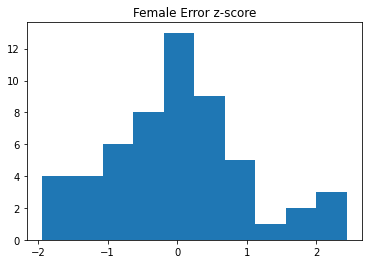

In [36]:
result = regression(df[0])
result["e"]=result["pred"] - result[COLUMNS[1]]
plt_with_z_scoring(keys[0]+" Error z-score",result[["e"]])

### For 2nd Gender

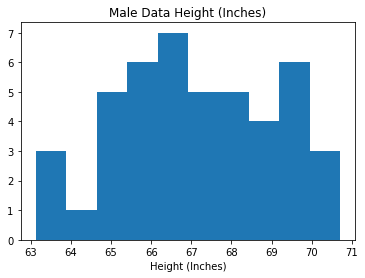

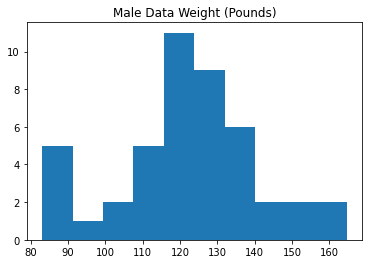

In [38]:
histo(keys[1]+" Data", df[1])

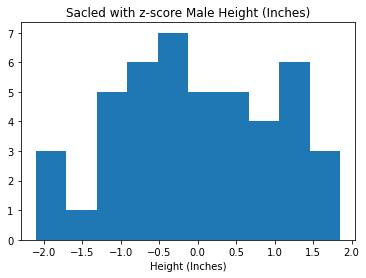

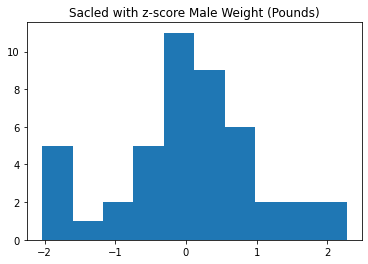

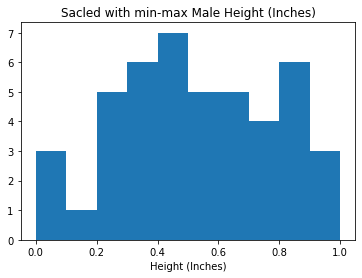

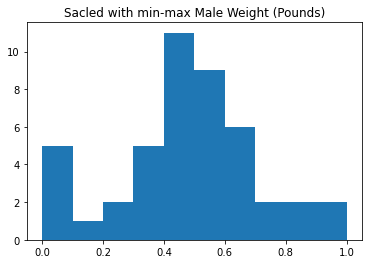

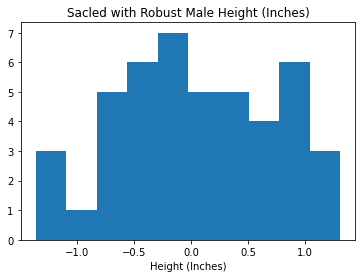

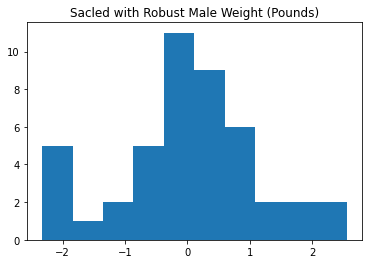

In [39]:
for scaler, title in scalers:
    scale_with_plt(df[1], scaler, title+" "+keys[1])  

In [40]:
#### regression and get error then plot

/tmp/ipykernel_185716/3840214713.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regressor.fit(height[:, np.newaxis], weight)
/tmp/ipykernel_185716/3840214713.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  pred = regressor.predict(height[:, np.newaxis])
/tmp/ipykernel_185716/3840214713.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["pred"] = pred
/tmp/ipykernel_185716/3840214713.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

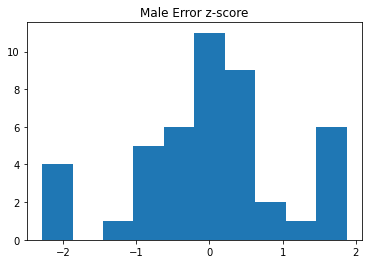

In [41]:
result = regression(df[1])
result["e"]=result["pred"] - result[COLUMNS[1]]
plt_with_z_scoring(keys[1]+" Error z-score",result[["e"]])